## 데이터 불러오기

In [54]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../ssd_data/combined_by_diskmodel/combined_MA1.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,n_12,...,n_233,n_241,r_241,n_242,r_242,r_244,n_175,r_175,n_232,label
0,10045,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,38288.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,9.752124e+11,NaN,0
19059,3614,20190101,MA1,130.0,4.294967e+09,96.0,0.0,100.0,44475.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.125649e+12,NaN,0
19058,36107,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,40372.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.014122e+12,NaN,0
19057,36104,20190101,MA1,130.0,4.294967e+09,98.0,0.0,100.0,40369.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.014122e+12,NaN,0
19056,361,20190101,MA1,130.0,3.276881e+09,95.0,2.0,100.0,46646.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.181125e+12,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.074284e+12,NaN,0
4728265,17781,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.074284e+12,NaN,0
4728264,17715,20190630,MA1,130.0,4.294967e+09,96.0,0.0,100.0,40284.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.018248e+12,NaN,0
4728273,17929,20190630,MA1,130.0,4.294967e+09,97.0,1.0,100.0,49490.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1.241550e+12,NaN,0


In [55]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    return df

data = remove_null_columns(data)
data

,disk_id,ds,model,n_1,r_1,n_5,r_5,n_9,r_9,n_12,...,r_195,n_196,r_196,r_197,r_198,n_199,r_199,n_175,r_175,label
0,10045,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,38288.0,NaN,...,NaN,100.0,0.0,NaN,NaN,NaN,NaN,100.0,9.752124e+11,0
19059,3614,20190101,MA1,130.0,4.294967e+09,96.0,0.0,100.0,44475.0,100.0,...,1.120414e+09,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1.125649e+12,0
19058,36107,20190101,MA1,130.0,4.294967e+09,97.0,0.0,100.0,40372.0,100.0,...,8.552900e+05,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1.014122e+12,0
19057,36104,20190101,MA1,130.0,4.294967e+09,98.0,0.0,100.0,40369.0,100.0,...,1.044777e+06,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1.014122e+12,0
19056,361,20190101,MA1,130.0,3.276881e+09,95.0,2.0,100.0,46646.0,100.0,...,1.091491e+06,99.0,2.0,0.0,0.0,100.0,0.0,100.0,1.181125e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,100.0,0.0,NaN,NaN,NaN,NaN,100.0,1.074284e+12,0
4728265,17781,20190630,MA1,130.0,4.294967e+09,97.0,0.0,100.0,42460.0,NaN,...,NaN,100.0,0.0,NaN,NaN,NaN,NaN,100.0,1.074284e+12,0
4728264,17715,20190630,MA1,130.0,4.294967e+09,96.0,0.0,100.0,40284.0,100.0,...,8.232852e+06,100.0,0.0,0.0,0.0,100.0,0.0,100.0,1.018248e+12,0
4728273,17929,20190630,MA1,130.0,4.294967e+09,97.0,1.0,100.0,49490.0,100.0,...,4.142201e+08,99.0,1.0,0.0,0.0,100.0,0.0,100.0,1.241550e+12,0


In [56]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

filtered_data = remove_single_value_columns(data)
filtered_data

['model', 'n_1', 'n_9', 'n_12', 'r_173', 'n_187', 'n_194', 'n_195', 'n_199']


,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,r_194,r_195,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label
0,10045,20190101,4.294967e+09,97.0,0.0,38288.0,NaN,NaN,NaN,NaN,...,12.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,9.752124e+11,0
19059,3614,20190101,4.294967e+09,96.0,0.0,44475.0,26.0,100.0,0.0,100.0,...,11.0,1.120414e+09,100.0,0.0,0.0,0.0,0.0,100.0,1.125649e+12,0
19058,36107,20190101,4.294967e+09,97.0,0.0,40372.0,37.0,100.0,0.0,100.0,...,16.0,8.552900e+05,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19057,36104,20190101,4.294967e+09,98.0,0.0,40369.0,37.0,100.0,0.0,100.0,...,16.0,1.044777e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.014122e+12,0
19056,361,20190101,3.276881e+09,95.0,2.0,46646.0,39.0,100.0,1.0,100.0,...,16.0,1.091491e+06,99.0,2.0,0.0,0.0,0.0,100.0,1.181125e+12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728266,17784,20190630,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,16.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728265,17781,20190630,4.294967e+09,97.0,0.0,42460.0,NaN,NaN,NaN,NaN,...,15.0,NaN,100.0,0.0,NaN,NaN,NaN,100.0,1.074284e+12,0
4728264,17715,20190630,4.294967e+09,96.0,0.0,40284.0,52.0,100.0,0.0,100.0,...,14.0,8.232852e+06,100.0,0.0,0.0,0.0,0.0,100.0,1.018248e+12,0
4728273,17929,20190630,4.294967e+09,97.0,1.0,49490.0,47.0,100.0,0.0,100.0,...,14.0,4.142201e+08,99.0,1.0,0.0,0.0,0.0,100.0,1.241550e+12,0


NaN갑과 특정 숫자 하나만 가지는 feature가 존재하는데, 제거하지 않고 일단 남겨놓고 진행

## EDA

In [57]:
print(data.shape)
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]
nan_stats

(4744315, 40)


n_199      0.273984
r_199      0.273984
r_198      0.273983
r_197      0.273983
n_12       0.273983
r_12       0.273983
r_174      0.273982
r_195      0.273982
n_195      0.273982
r_187      0.273981
n_187      0.273981
r_184      0.273981
n_184      0.273981
n_172      0.273980
r_190      0.273980
n_190      0.273980
r_172      0.273980
n_171      0.273980
r_188      0.273980
r_171      0.273980
r_196      0.000040
n_196      0.000040
n_194      0.000038
r_1        0.000038
n_1        0.000038
r_173      0.000038
n_173      0.000038
r_194      0.000038
r_175      0.000038
r_180      0.000038
n_5        0.000038
n_175      0.000038
r_5        0.000038
n_180      0.000038
n_9        0.000038
r_9        0.000038
disk_id    0.000000
ds         0.000000
model      0.000000
label      0.000000
dtype: float64

In [79]:
features_data = data.drop(columns=['disk_id','ds','model'])
features_info=features_data.describe()

In [ ]:
features_info.iloc[:,:14]

,n_1,r_1,n_5,r_5,n_9,r_9,n_12,r_12,n_171,r_171,n_172,r_172,n_173,r_173
count,4744133.0,4.744133e+06,4.744135e+06,4.744135e+06,4744137.0,4.744137e+06,3444455.0,3.444455e+06,3.444469e+06,3.444469e+06,3.444468e+06,3.444468e+06,4.744133e+06,4744133.0
mean,130.0,4.063660e+09,9.658193e+01,1.237807e+01,100.0,4.174709e+04,100.0,4.243925e+01,9.996780e+01,4.964246e+00,9.999734e+01,1.228047e-01,7.403667e+01,0.0
std,0.0,9.100537e+08,3.447542e+00,1.624807e+02,0.0,5.536795e+03,0.0,5.491130e+01,1.474926e+00,3.305743e+02,1.791820e-01,7.432831e+00,2.645398e+01,0.0
min,130.0,4.550000e+02,1.000000e+00,0.000000e+00,100.0,3.143000e+03,100.0,4.000000e+00,1.000000e+00,0.000000e+00,8.700000e+01,0.000000e+00,1.000000e+00,0.0
25%,130.0,4.294967e+09,9.600000e+01,0.000000e+00,100.0,3.980900e+04,100.0,3.200000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,6.100000e+01,0.0
50%,130.0,4.294967e+09,9.700000e+01,0.000000e+00,100.0,4.167800e+04,100.0,3.700000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,8.600000e+01,0.0
75%,130.0,4.294967e+09,9.800000e+01,0.000000e+00,100.0,4.445600e+04,100.0,4.500000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,9.400000e+01,0.0
max,130.0,4.294967e+10,9.800000e+01,6.574000e+03,100.0,5.160900e+04,100.0,1.547000e+03,1.000000e+02,3.900500e+04,1.000000e+02,5.120000e+02,1.000000e+02,0.0


In [69]:
features_info.iloc[:,14:28]

,r_174,n_180,r_180,n_184,r_184,n_187,r_187,r_188,n_190,r_190,n_194,r_194,n_195,r_195
count,3.444459e+06,4.744135e+06,4.744135e+06,3.444465e+06,3.444465e+06,3444464.0,3.444464e+06,3.444469e+06,3.444468e+06,3.444468e+06,4744133.0,4.744133e+06,3444459.0,3.444459e+06
mean,4.015598e+01,1.299874e+02,4.028024e+10,9.998690e+01,2.738769e+03,100.0,2.586760e-04,2.748993e+03,8.492586e+01,1.507409e+01,100.0,1.512052e+01,100.0,4.361046e+08
std,5.490240e+01,6.900533e-01,2.315334e+12,1.136533e+00,5.187394e+05,0.0,4.824953e-02,5.187395e+05,2.343267e+00,2.343276e+00,0.0,2.414965e+00,0.0,6.151288e+08
min,2.000000e+00,5.800000e+01,5.340000e+02,1.000000e+00,0.000000e+00,100.0,0.000000e+00,0.000000e+00,6.500000e+01,6.000000e+00,100.0,6.000000e+00,100.0,1.665700e+04
25%,2.900000e+01,1.300000e+02,4.294967e+09,1.000000e+02,0.000000e+00,100.0,0.000000e+00,0.000000e+00,8.400000e+01,1.400000e+01,100.0,1.400000e+01,100.0,1.212292e+07
50%,3.400000e+01,1.300000e+02,4.294967e+09,1.000000e+02,0.000000e+00,100.0,0.000000e+00,0.000000e+00,8.500000e+01,1.500000e+01,100.0,1.500000e+01,100.0,1.347381e+08
75%,4.300000e+01,1.300000e+02,4.294967e+09,1.000000e+02,0.000000e+00,100.0,0.000000e+00,0.000000e+00,8.600000e+01,1.600000e+01,100.0,1.600000e+01,100.0,6.719806e+08
max,1.544000e+03,1.300000e+02,2.808178e+14,1.000000e+02,9.826084e+07,100.0,9.000000e+00,9.826090e+07,9.400000e+01,3.500000e+01,100.0,3.500000e+01,100.0,4.294929e+09


In [70]:
features_info.iloc[:,28:]

,n_196,r_196,r_197,r_198,n_199,r_199,n_175,r_175
count,4.744124e+06,4.744124e+06,3.444453e+06,3.444453e+06,3444449.0,3.444449e+06,4.744135e+06,4.744135e+06
mean,9.968690e+01,1.237767e+01,1.307000e-02,3.205734e-02,100.0,7.597772e+01,9.952492e+01,1.054925e+12
std,2.773435e+00,1.624782e+02,8.793292e-01,2.310285e+00,0.0,4.166093e+03,6.841566e+00,1.406102e+11
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,0.000000e+00,1.000000e+00,8.175059e+10
25%,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,100.0,0.000000e+00,1.000000e+02,1.005449e+12
50%,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,100.0,0.000000e+00,1.000000e+02,1.052659e+12
75%,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,100.0,0.000000e+00,1.000000e+02,1.125448e+12
max,1.000000e+02,6.574000e+03,1.605000e+03,2.860000e+02,100.0,6.131280e+05,1.000000e+02,1.318835e+12


<AxesSubplot:>

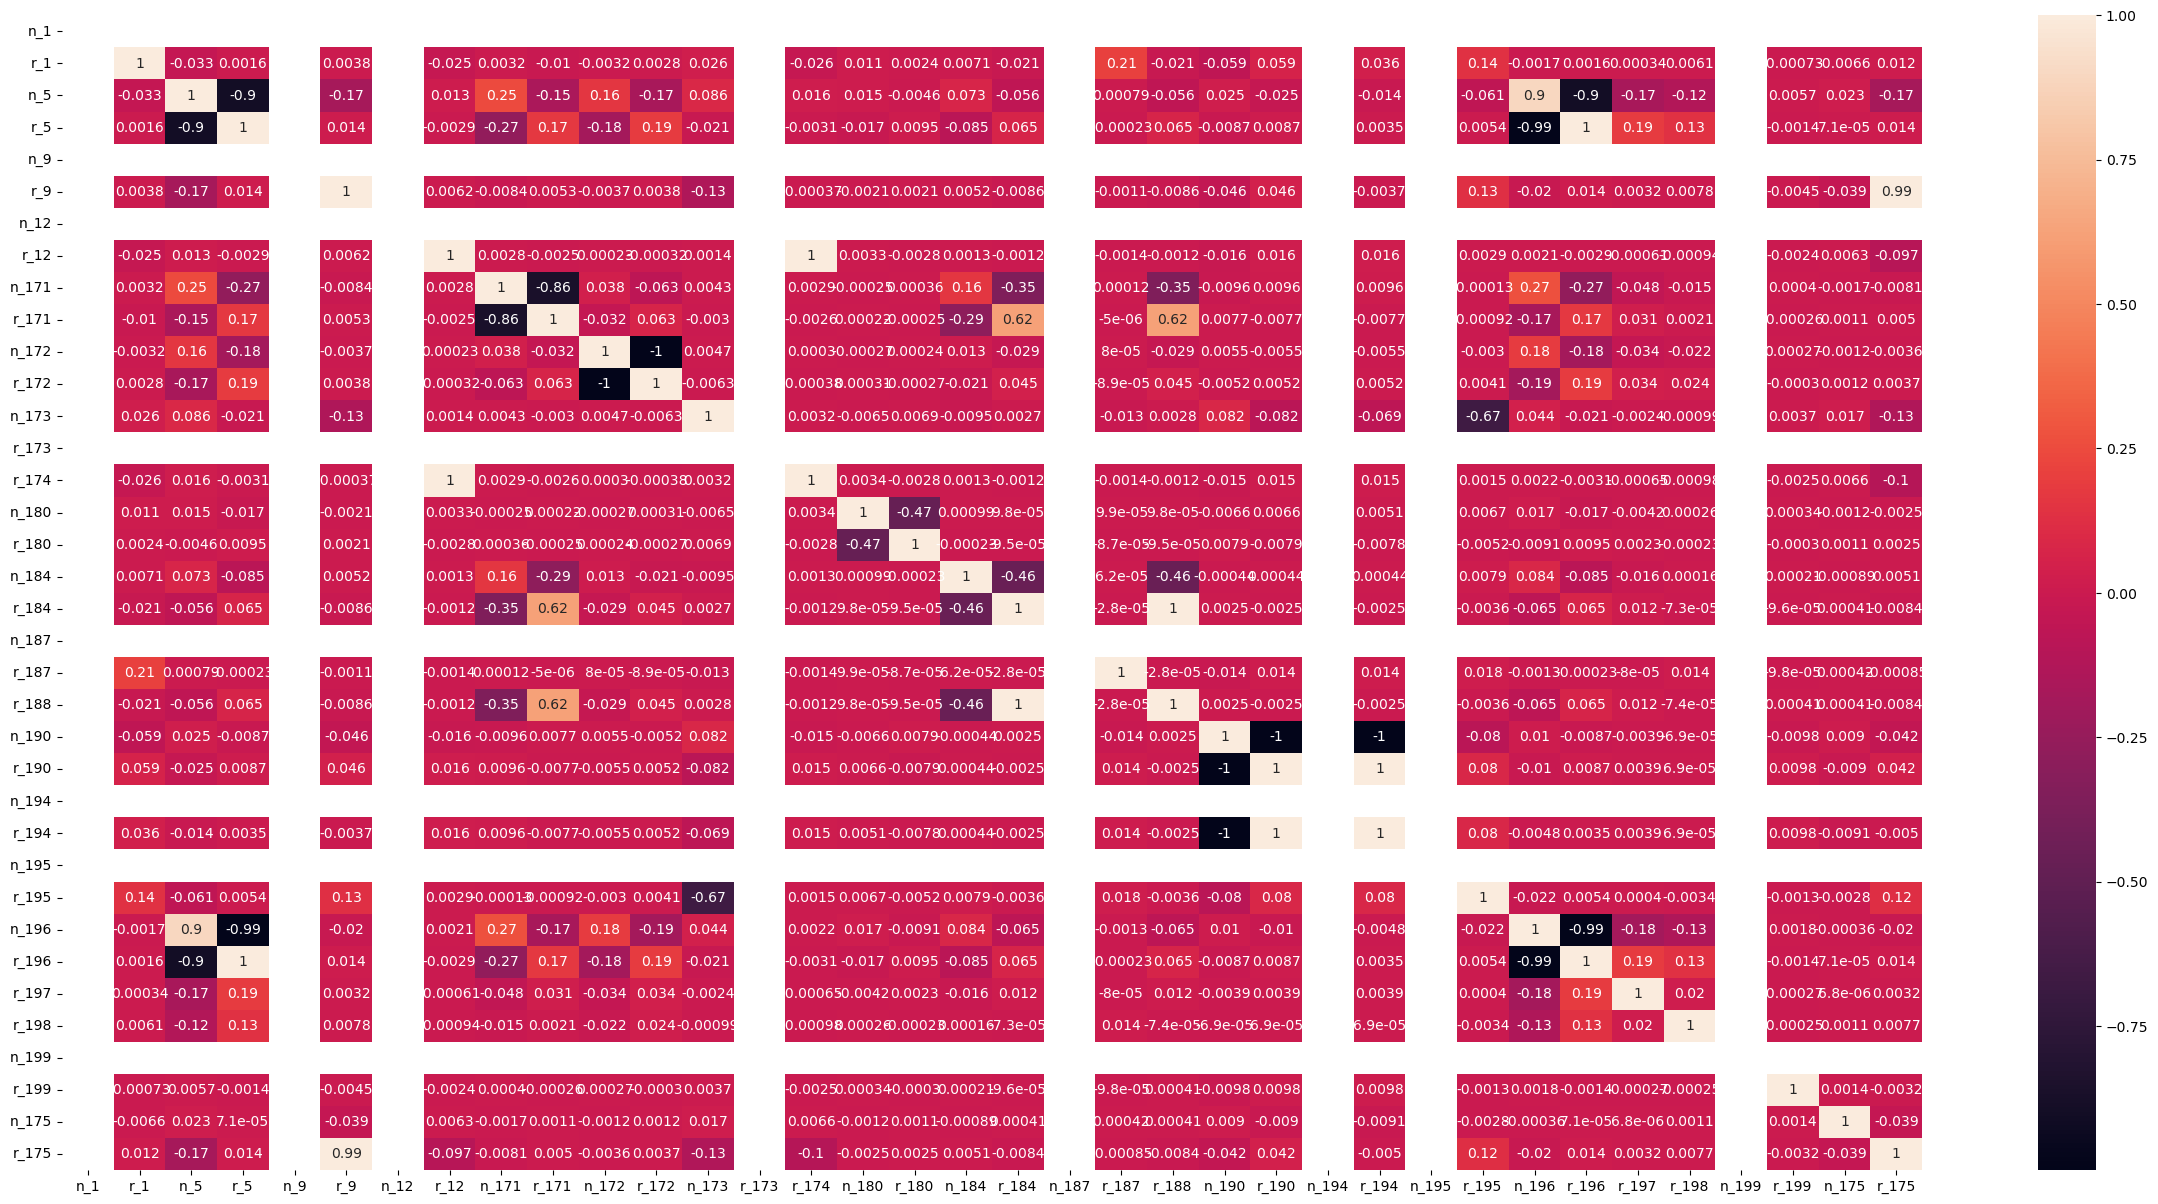

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서
corr = features_data.corr()
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [ ]:
# 상관계수의 절대값이 0.4 이상인 셀만 선택
corr_np = np.abs(corr.values)
mask = corr_np > 0.4

# 선택한 셀의 행렬에서 대각선을 제거(자기 자신과의 상관계수는 항상 1)
mask[np.triu_indices_from(mask, k=1)] = False

# 마스크 적용
high_corr = corr_np[mask]

# 해당하는 feature 쌍 print
high_corr_pairs = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] and i != j:  # 추가된 부분: i와 j가 같지 않을 때만 추가
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(high_corr_pairs)

[('r_5', 'n_5'), ('r_171', 'n_171'), ('r_172', 'n_172'), ('r_174', 'r_12'), ('r_180', 'n_180'), ('r_184', 'r_171'), ('r_184', 'n_184'), ('r_188', 'r_171'), ('r_188', 'n_184'), ('r_188', 'r_184'), ('r_190', 'n_190'), ('r_194', 'n_190'), ('r_194', 'r_190'), ('r_195', 'n_173'), ('n_196', 'n_5'), ('n_196', 'r_5'), ('r_196', 'n_5'), ('r_196', 'r_5'), ('r_196', 'n_196'), ('r_175', 'r_9')]


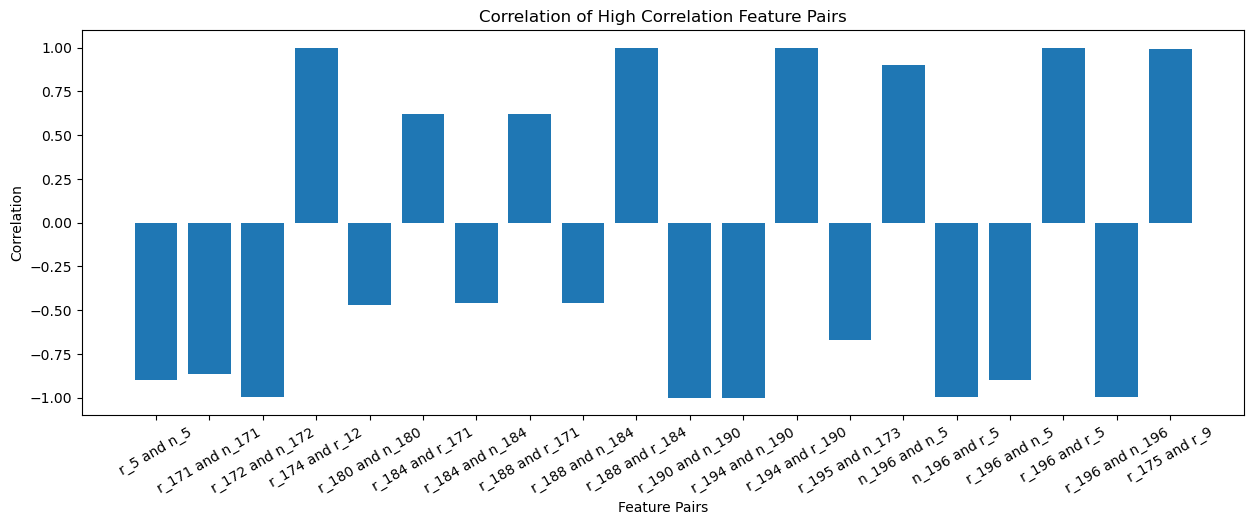

In [ ]:
import matplotlib.pyplot as plt

# 상관계수 값 가져오기
high_corr_values = [corr.loc[pair] for pair in high_corr_pairs]

# 특성 쌍 이름 가져오기
pair_names = [f"{pair[0]} and {pair[1]}" for pair in high_corr_pairs]

# bar plot 그리기
plt.figure(figsize=(15, 5))
plt.bar(pair_names, high_corr_values)
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation')
plt.title('Correlation of High Correlation Feature Pairs')
plt.xticks(rotation=30)
plt.show()

## About Failed data

- 처음 관측된 값이 2019년 1월 2일 이후에 존재하는 데이터를 "새로 사용하기 시작한 SSD"라고 가정하고,</br>
fail이 일어나기까지 "몇 일"이 걸렸는지를 분석하고자 함

In [ ]:
# 각 disk_id의 첫 시점 계산
df_first_ds = pd.to_datetime(data.groupby('disk_id')['ds'].min(), format='%Y%m%d')

# 각 disk_id의 첫 시점이 20190103 이상인 disk_id만 선택
selected_disk_ids = df_first_ds[df_first_ds >= pd.to_datetime('20190102', format='%Y%m%d')].index

# 선택된 disk_id만 포함하는 데이터만 선택
data_selected = data[data['disk_id'].isin(selected_disk_ids)]

# label=1인 데이터만 필터링
df_label1 = data_selected[data_selected['label'] == 1]

# 각 disk_id에서 label=1이 처음으로 나타난 시점 계산
df_first_label1 = pd.to_datetime(df_label1.groupby('disk_id')['ds'].min(), format='%Y%m%d')

# label=1이 처음으로 나타난 시점이 각 disk_id의 첫 시점으로부터 얼마나 떨어져 있는지 계산
time_diff = (df_first_label1 - df_first_ds.loc[selected_disk_ids]).dt.days  # 이 경우, 결과는 '일' 단위입니다.

# 차이가 20일 이하인 데이터의 수 계산
count_less_than_20 = (time_diff <= 20).sum()

# 차이가 20일 초과인 데이터의 수 계산
count_more_than_20 = (time_diff > 20).sum()

print("The number of data with a difference of 20 days or less: ", count_less_than_20)
print("The number of data with a difference more than 20 days: ", count_more_than_20)

The number of data with a difference of 20 days or less:  25
The number of data with a difference more than 20 days:  28


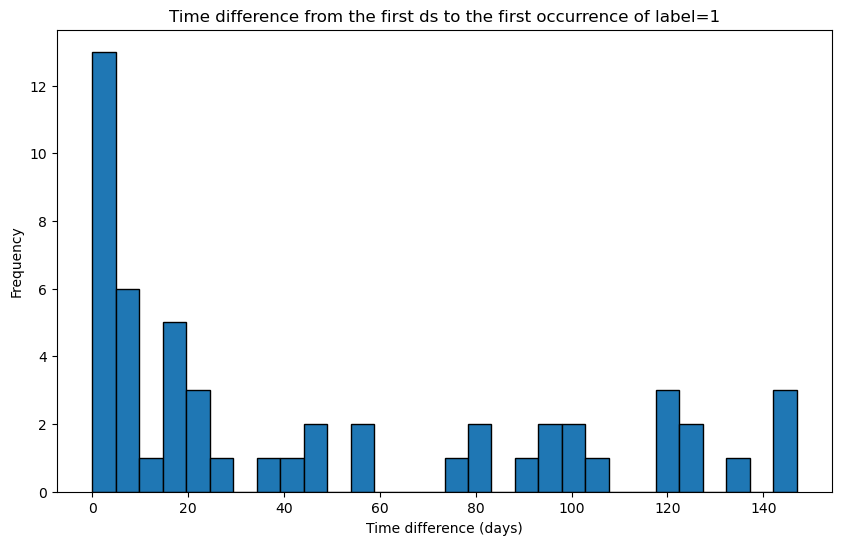

In [63]:
# 결과 히스토그램 그리기
plt.figure(figsize=(10, 6))
time_diff.hist(bins=30, edgecolor='k')
plt.title('Time difference from the first ds to the first occurrence of label=1')
plt.xlabel('Time difference (days)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

- 20일 

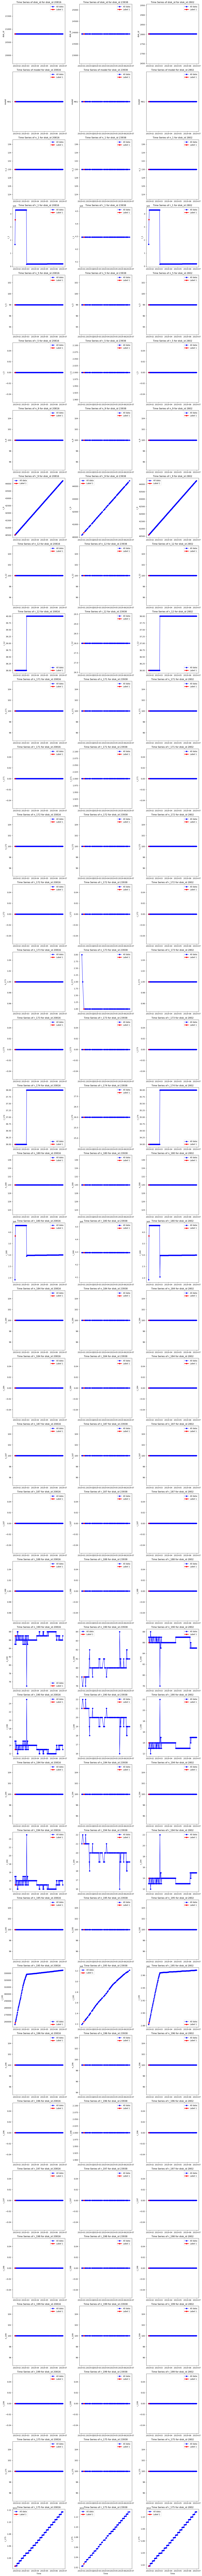

In [64]:
import numpy as np

# 차이가 20일 이하인 disk_id 선택
disk_ids = time_diff[time_diff <= 20].index

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

## healthy VS failed 각 feature별 히스토그램

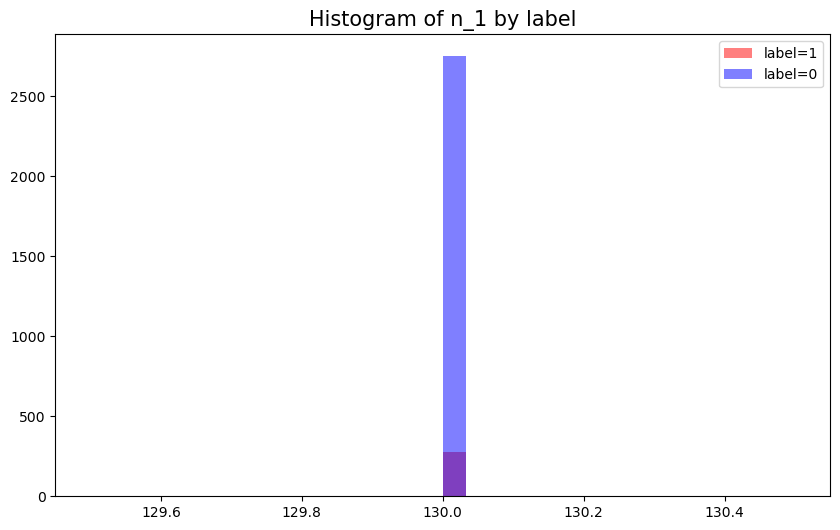

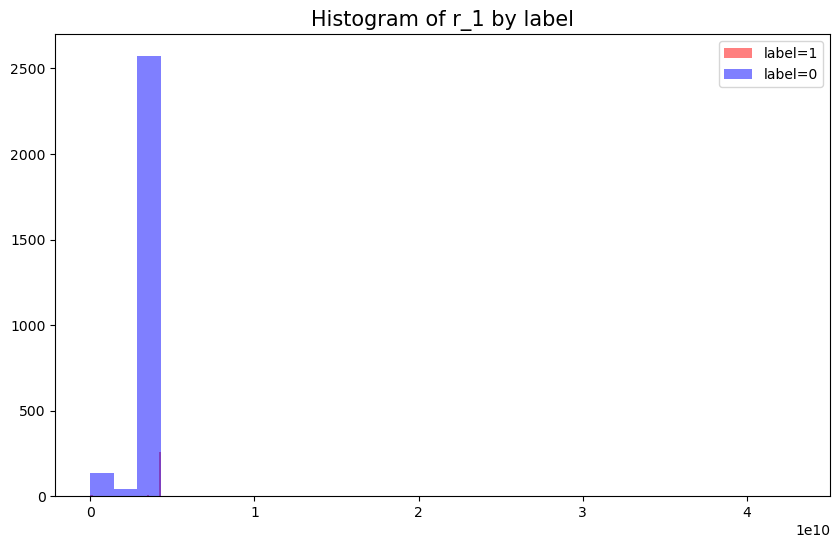

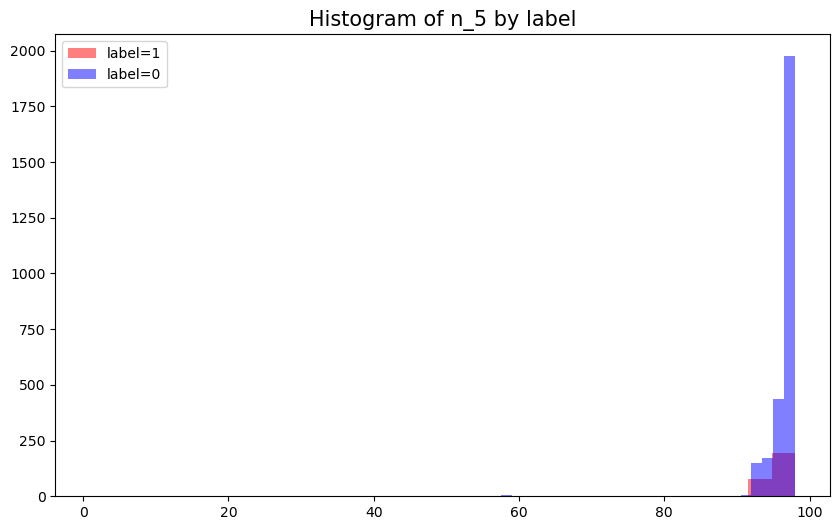

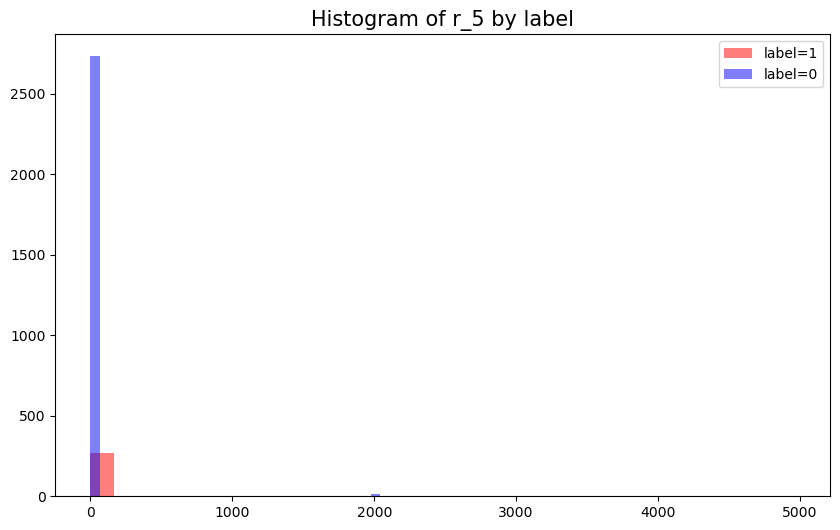

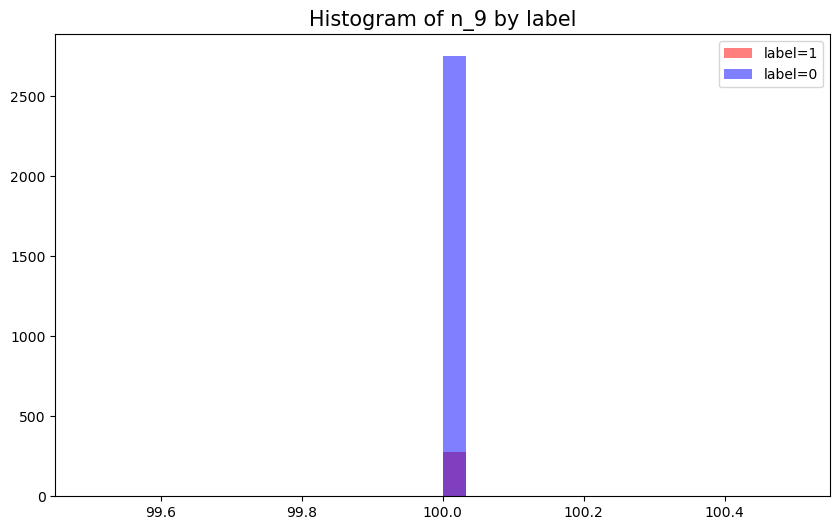

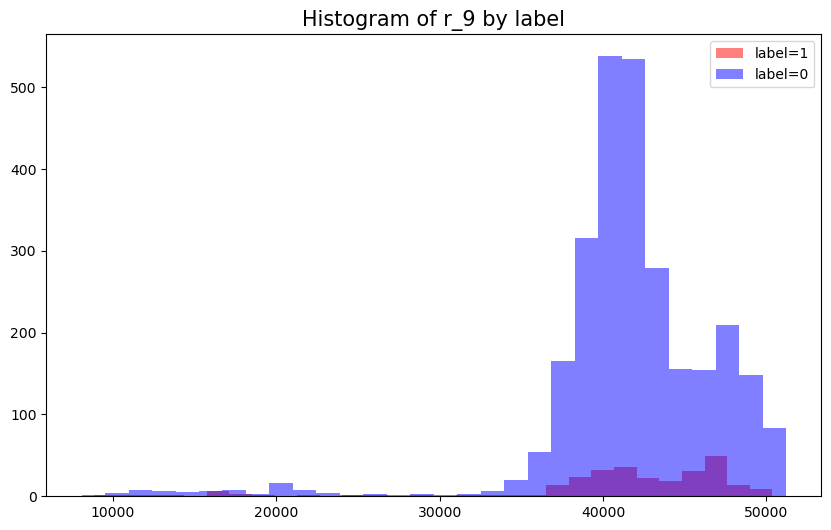

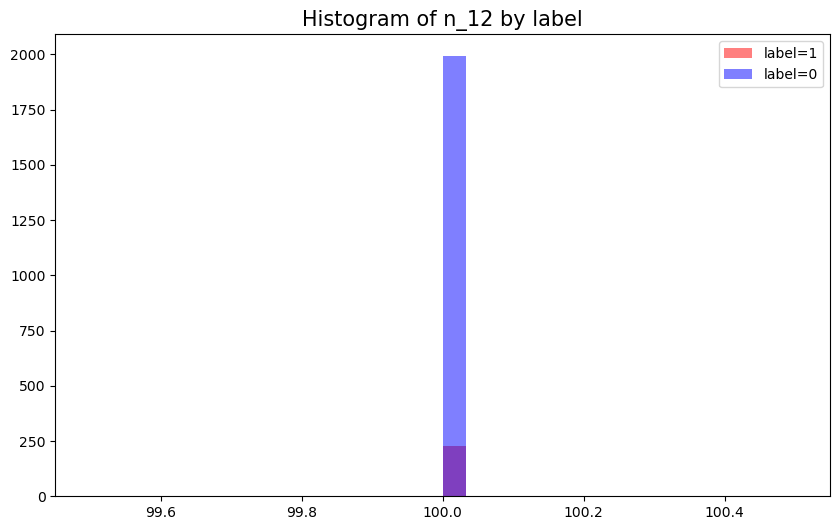

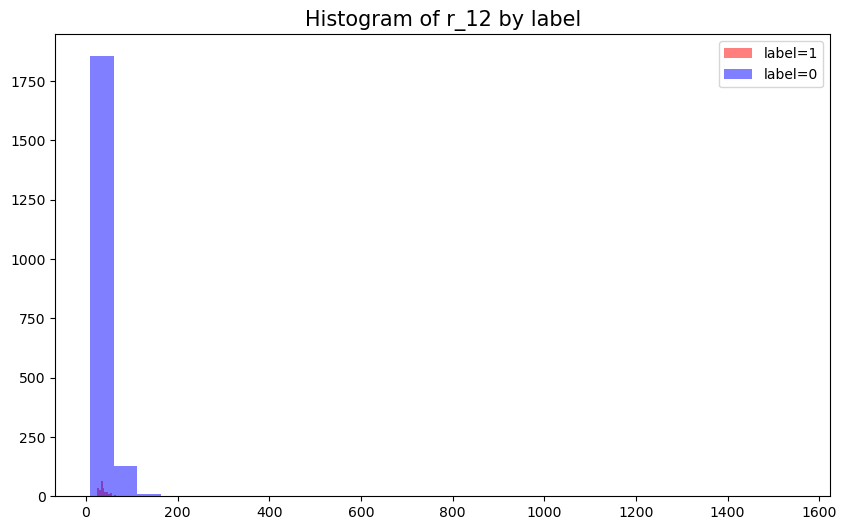

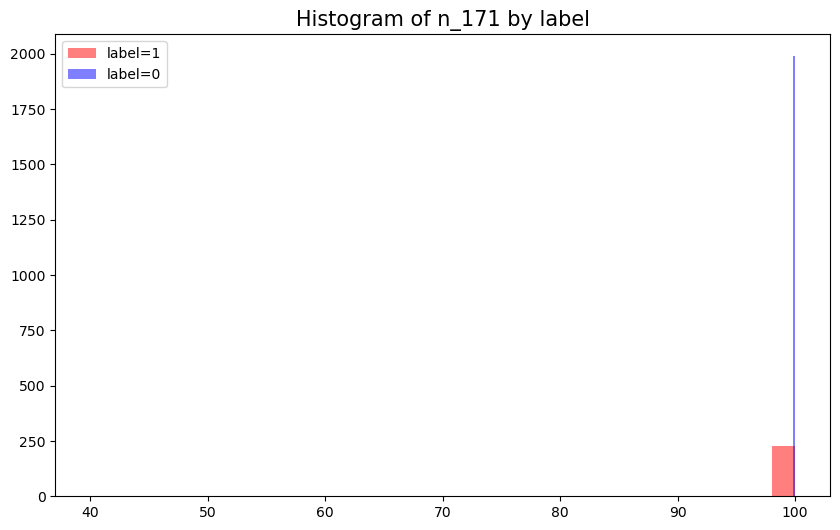

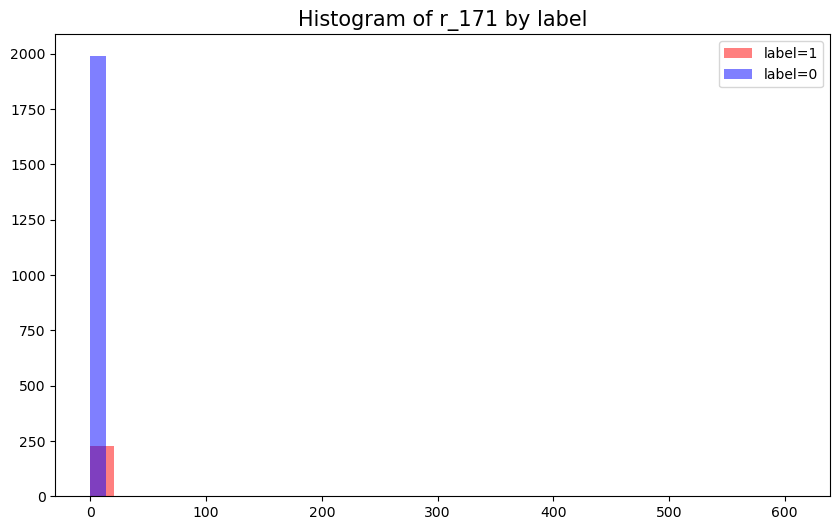

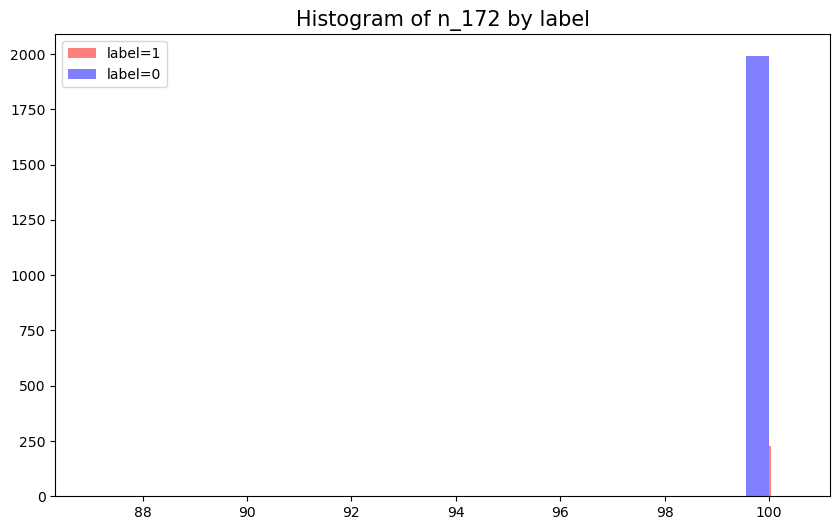

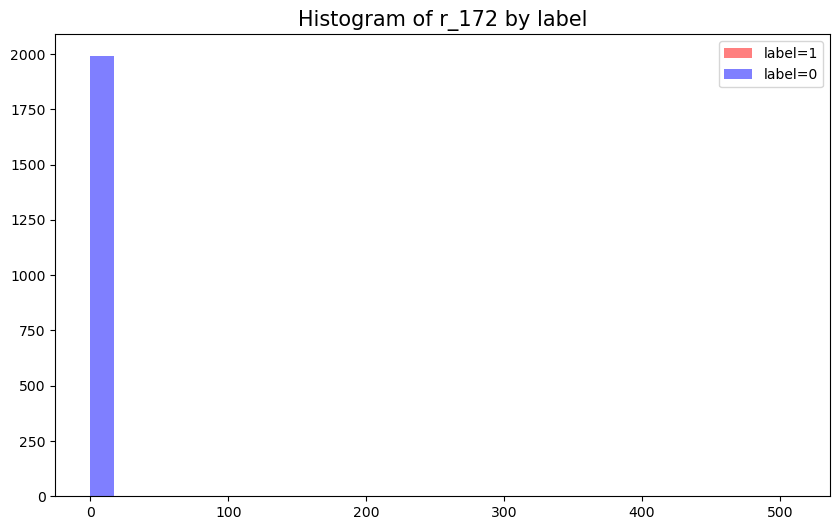

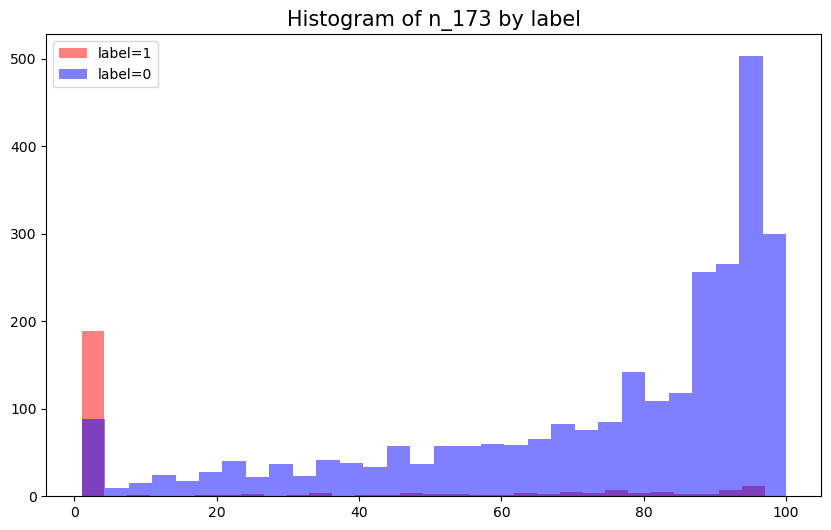

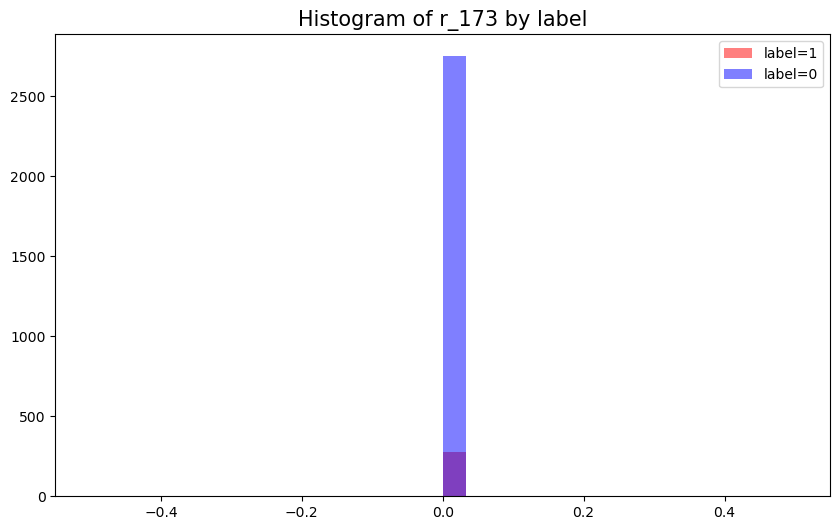

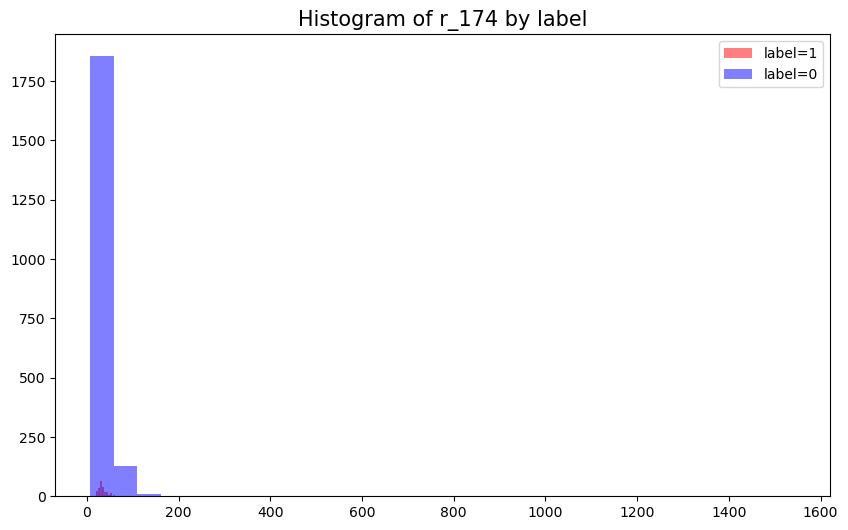

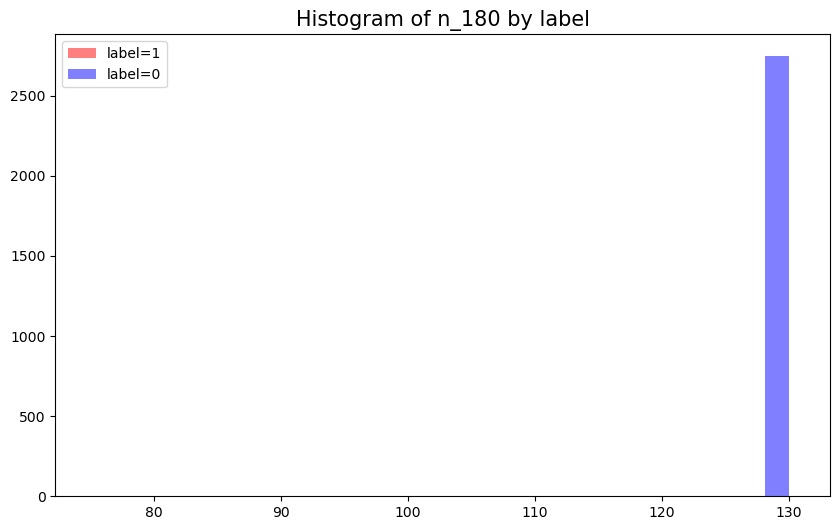

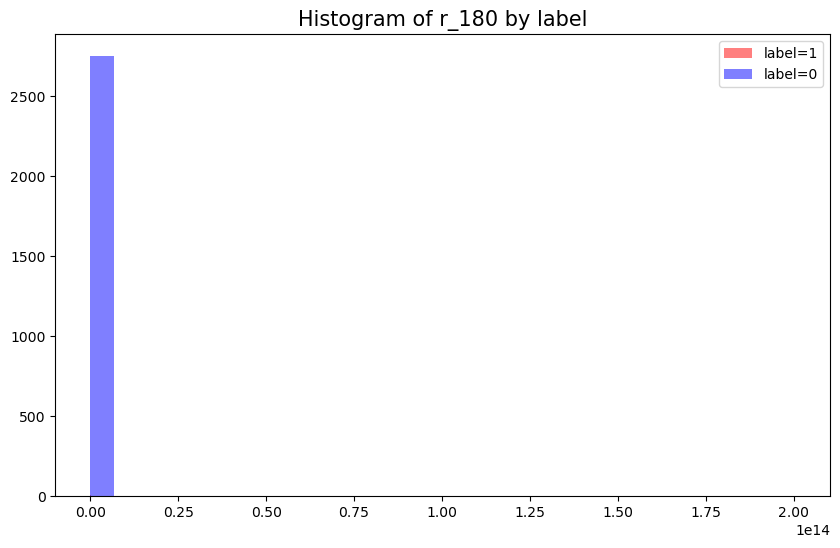

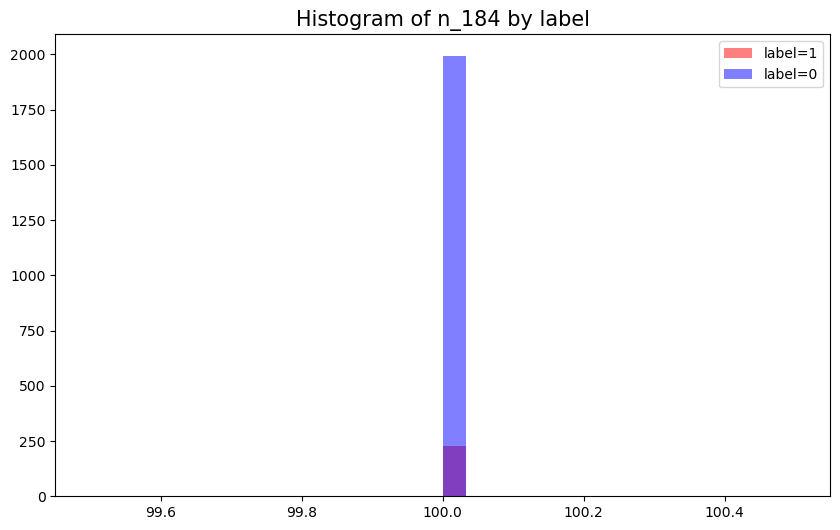

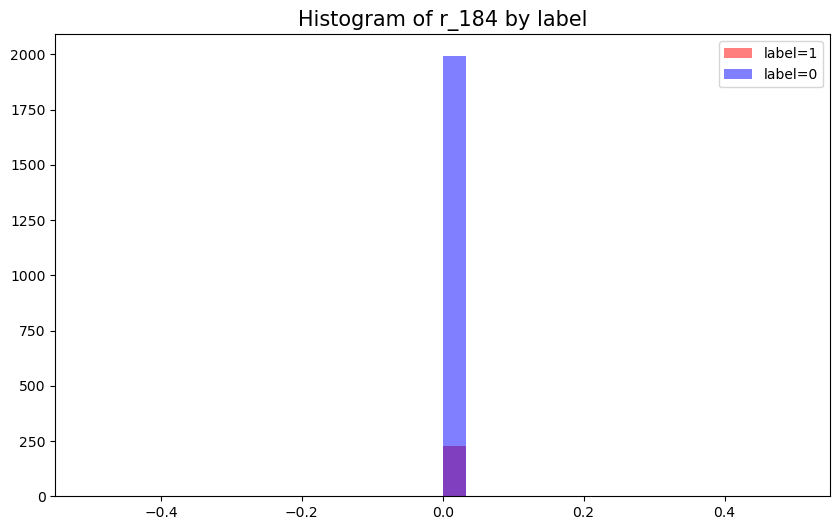

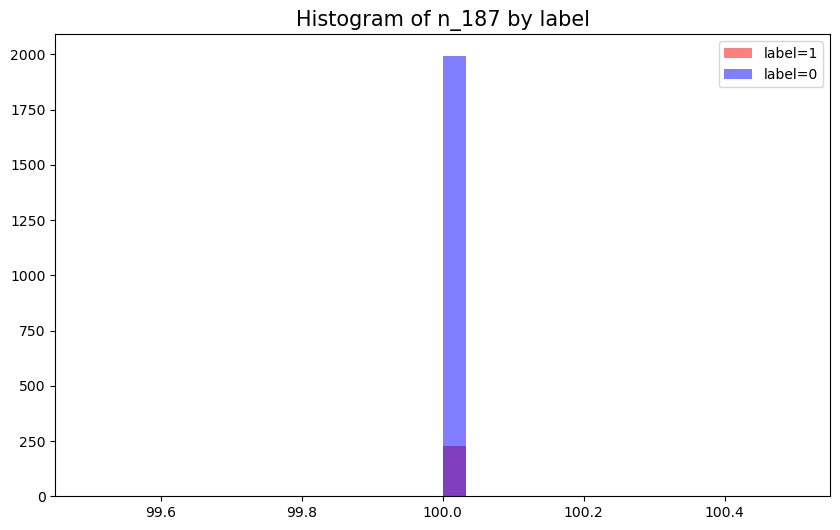

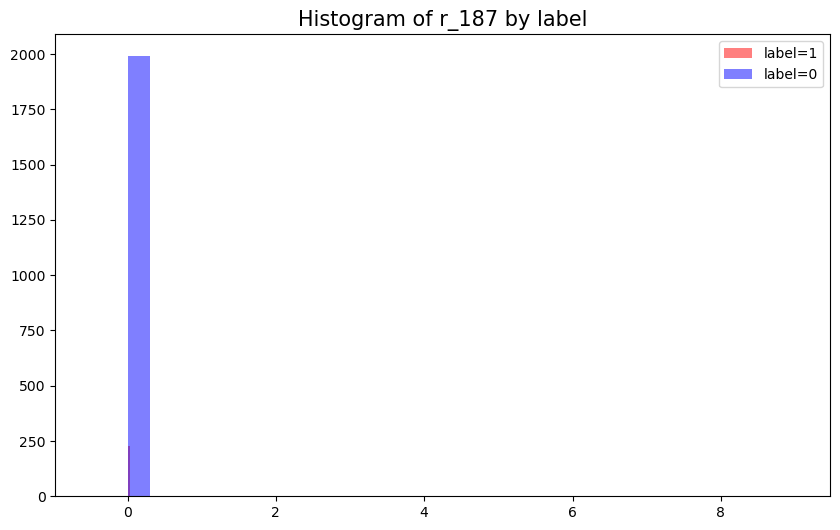

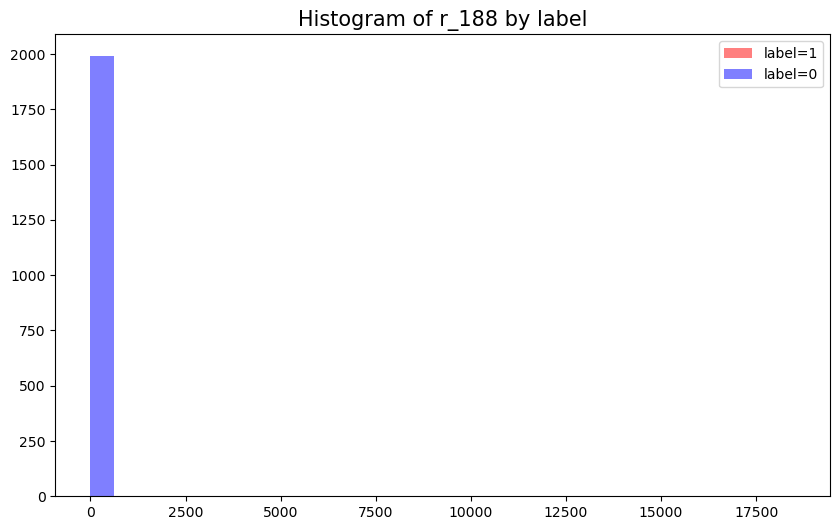

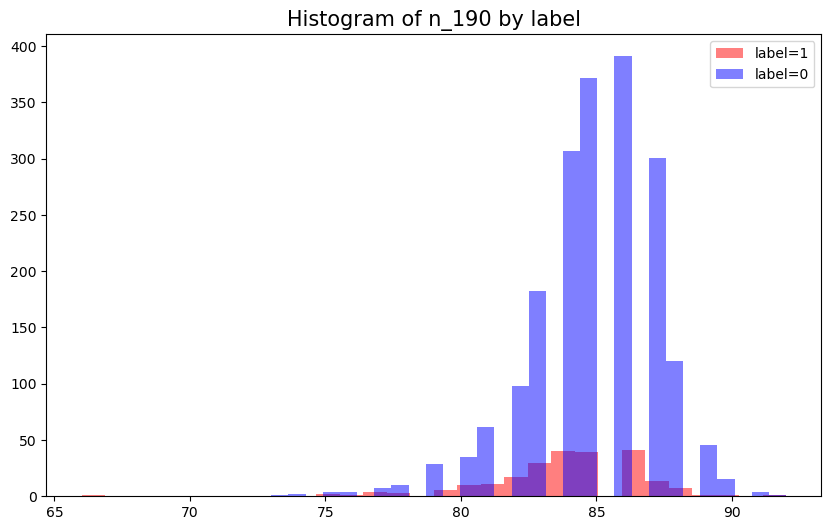

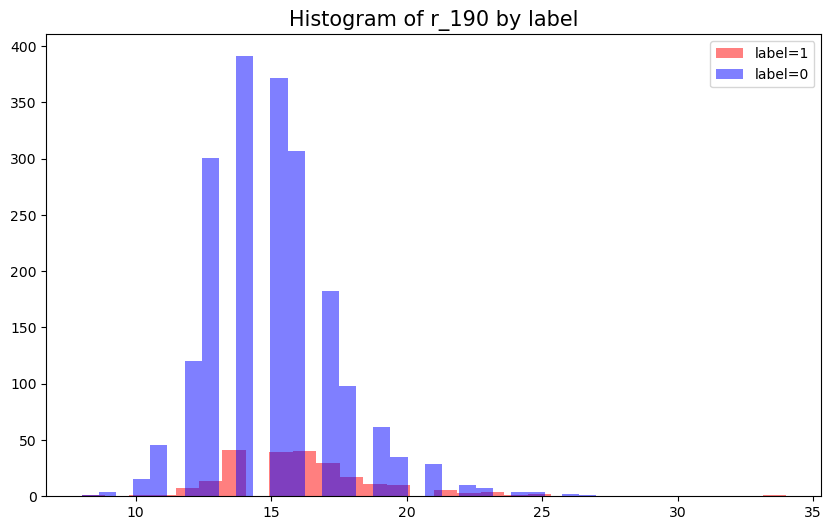

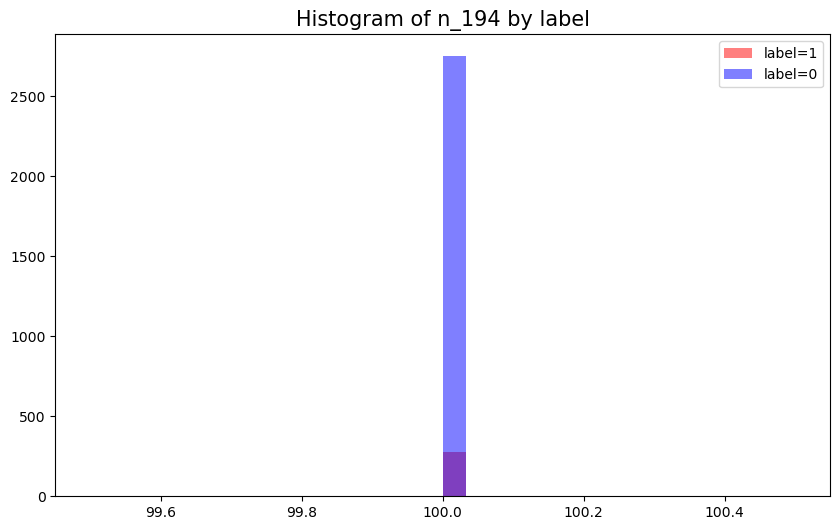

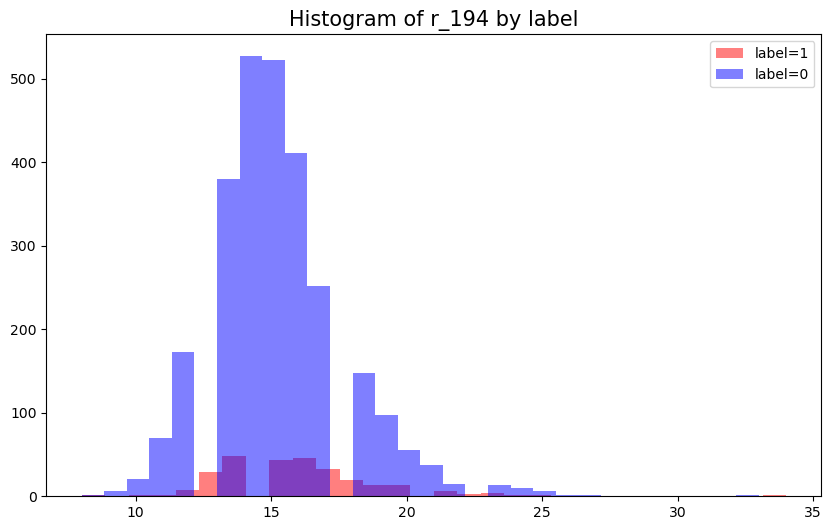

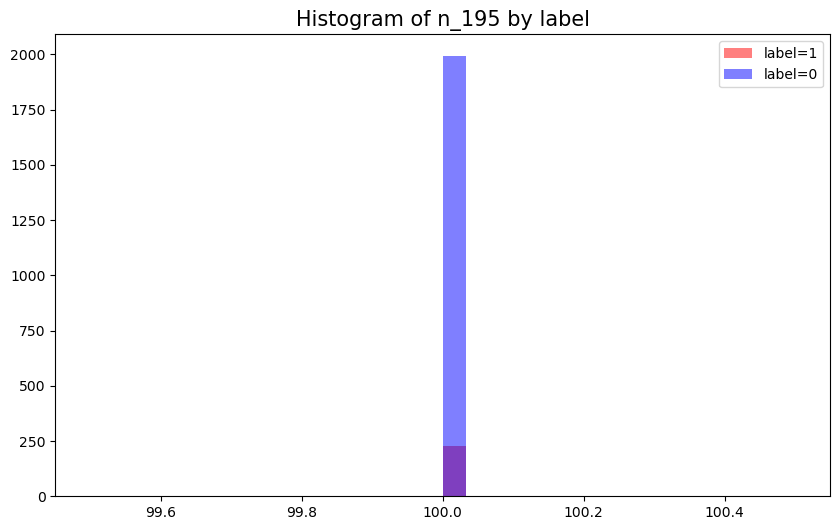

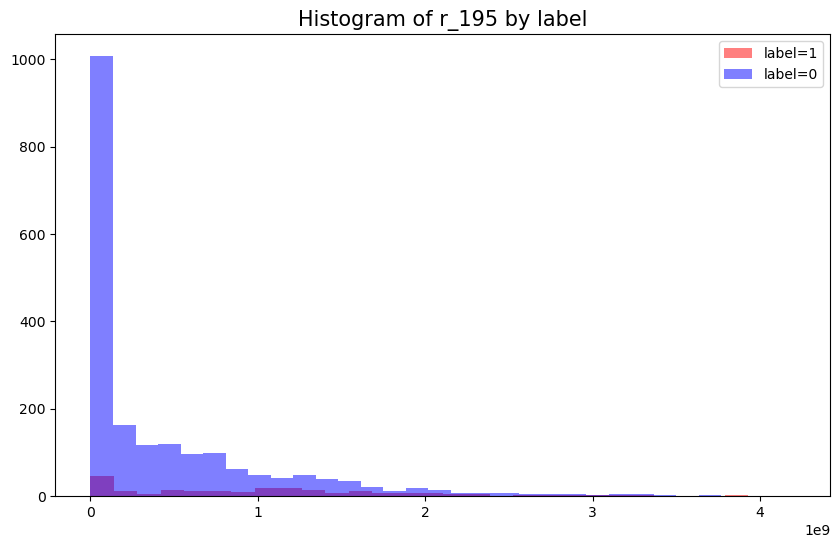

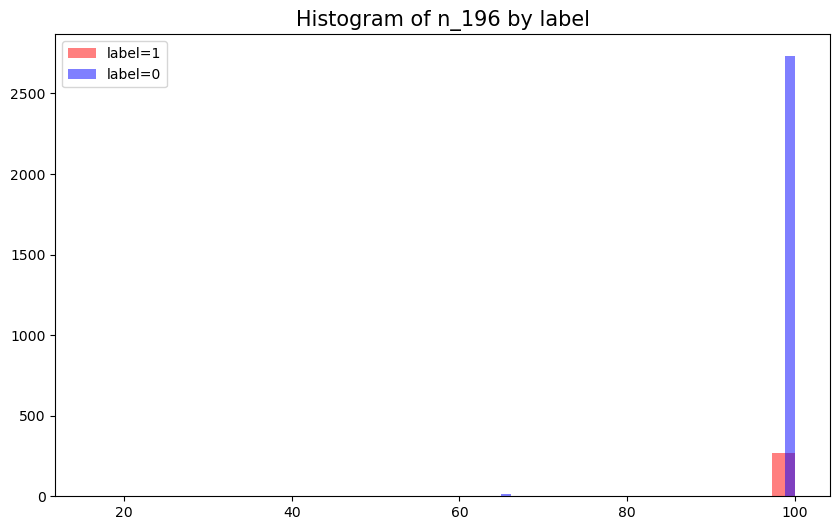

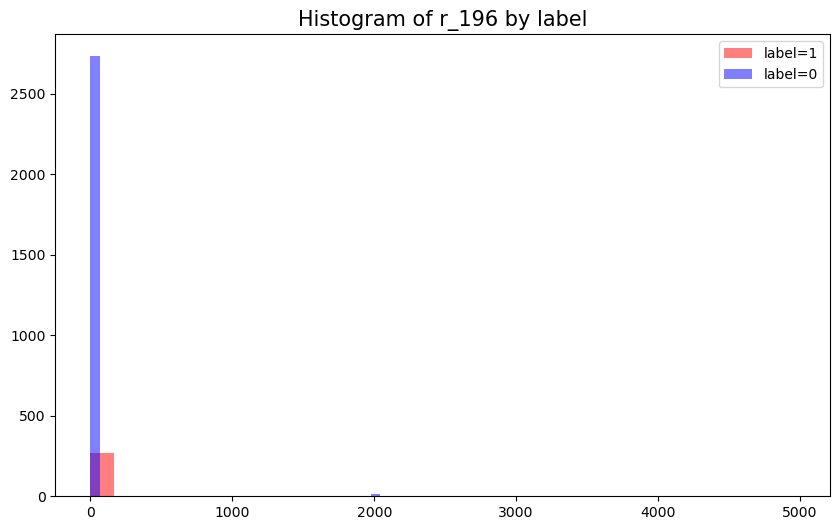

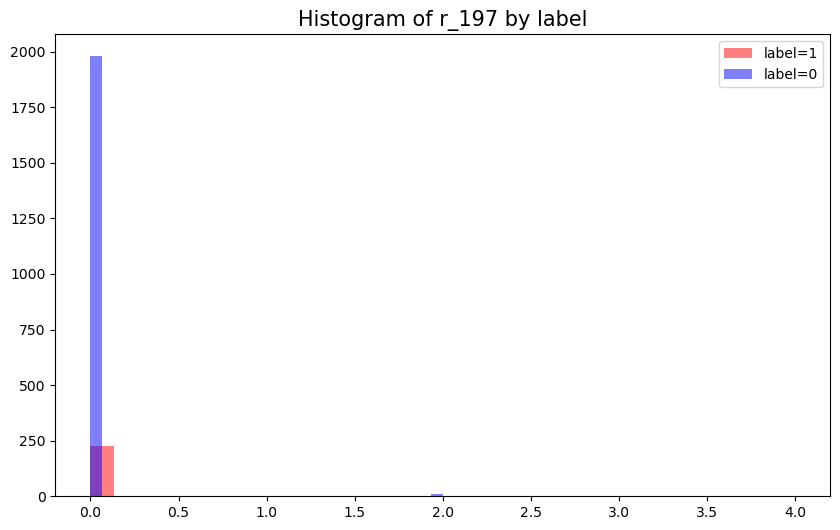

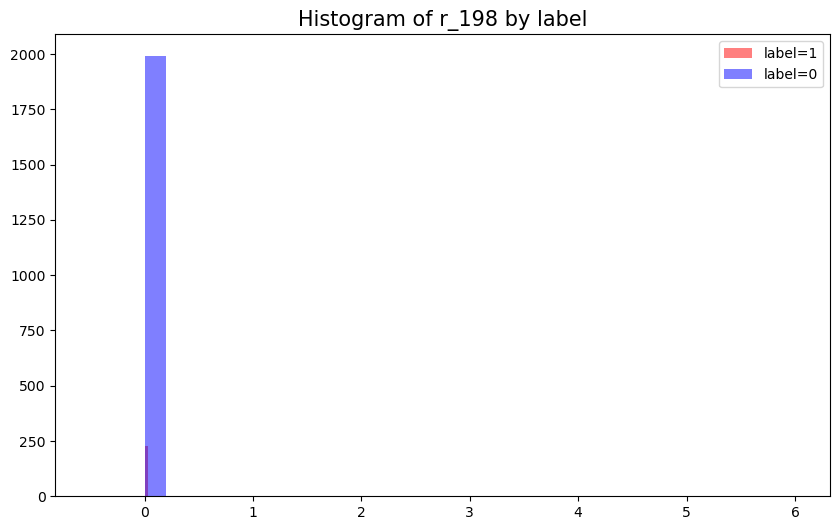

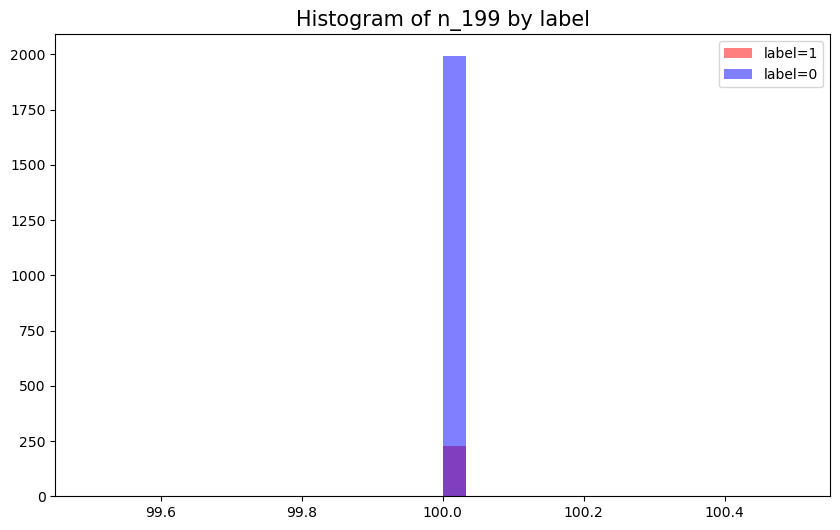

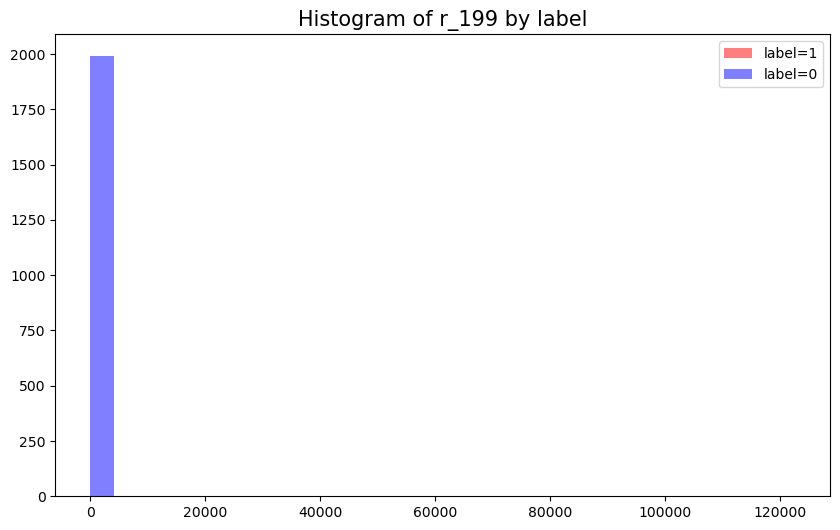

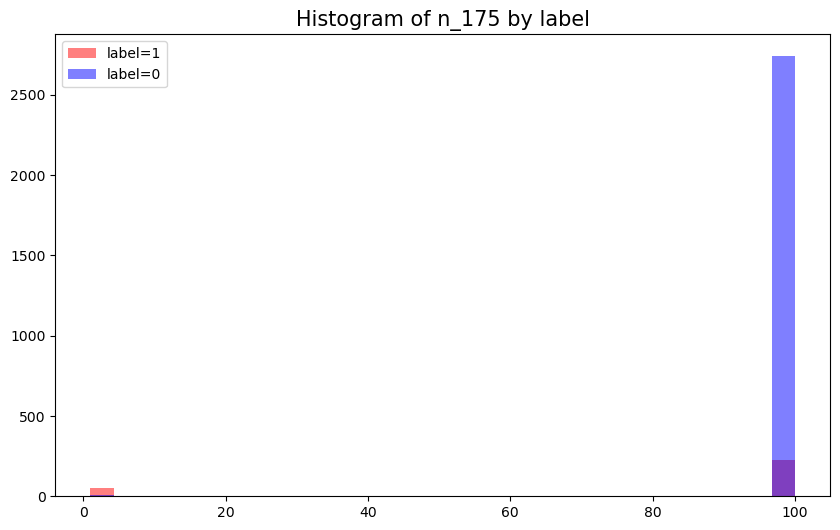

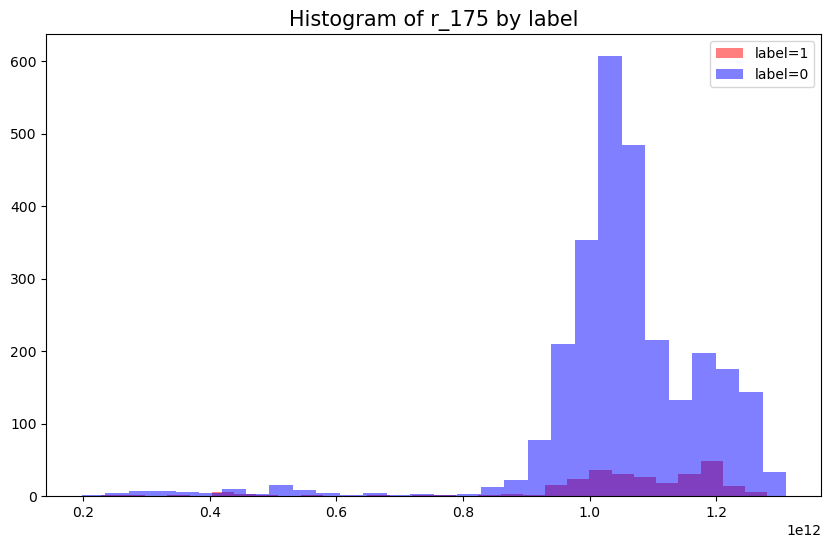

In [84]:
import numpy as np

# 'label' 컬럼을 제외한 피처들만 선택합니다.
features = [col for col in features_data.columns if col != 'label']

# 라벨 0과 1에 대해 같은 수의 샘플을 무작위로 선택합니다.
# 여기서는 라벨 1의 데이터 수를 기준으로 합니다.
n_samples = features_data[features_data['label'] == 1].shape[0]
label0_data = features_data[features_data['label'] == 0].sample(n_samples*10)
label1_data = features_data[features_data['label'] == 1]

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # label=1인 데이터의 히스토그램 그리기 
    plt.hist(label1_data[feature].dropna(), color='r', alpha=0.5, bins=30)
    
    # label=0인 데이터의 히스토그램 그리기 
    plt.hist(label0_data[feature].dropna(), color='b', alpha=0.5, bins=30)
    
    plt.title('Histogram of ' + feature + ' by label', fontsize=15)
    plt.legend(['label=1', 'label=0'])
    plt.show()